In [298]:
import pandas as pd
import numpy as np

In [299]:
train_data = pd.read_csv('train.csv')
print(train_data.shape)
train_data.head(5)

(1022, 82)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,64,65,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,...,0,NaN,GdPrv,NaN,0,2,2009,WD,Normal,219500
1,651,652,70,RL,60.0,9084,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,10,2009,WD,Normal,108000
2,260,261,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2009,WD,Normal,176000
3,1089,1090,120,FV,37.0,3316,Pave,Pave,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,197000
4,1112,1113,20,RL,73.0,7100,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,129900


In [300]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)
test_data.head(5)

(438, 82)


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1436,1437,20,RL,60.0,9000,Pave,NaN,Reg,Lvl,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,120500
1,959,960,160,FV,24.0,2572,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,155000
2,441,442,90,RL,92.0,12108,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,118000
3,536,537,60,RL,57.0,8924,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,188000
4,488,489,190,RL,60.0,10800,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2006,ConLD,Normal,160000


In [301]:
# we can drop unnecessary collumns like unnamed and ID
train_data = train_data.drop(['Unnamed: 0', 'Id'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'Id'], axis=1)

In [302]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [303]:
# removing columns with missing values more than 5 (train data)
missing_values = train_data.isnull().sum()
columns_with_nan = missing_values[missing_values > 5]
print(columns_with_nan)
train_data = train_data.drop(columns_with_nan.index, axis=1)
train_data.shape

LotFrontage      180
Alley            962
MasVnrType       614
MasVnrArea         7
BsmtQual          29
BsmtCond          29
BsmtExposure      30
BsmtFinType1      29
BsmtFinType2      30
FireplaceQu      480
GarageType        54
GarageYrBlt       54
GarageFinish      54
GarageQual        54
GarageCond        54
PoolQC          1017
Fence            824
MiscFeature      990
dtype: int64


(1022, 62)

In [304]:
# removing the columns in the test data as well
test_data = test_data.drop(columns_with_nan.index, axis=1)
test_data.shape

(438, 62)

In [305]:
column_overpowered_with_same_val = []
for column in train_data.columns:
    if train_data[column].value_counts().iloc[0] / len(train_data) > 0.90:
        column_overpowered_with_same_val.append(column)

column_overpowered_with_same_val

['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [306]:
train_data = train_data.drop(column_overpowered_with_same_val, axis=1)
train_data.shape

(1022, 44)

In [307]:
test_data = test_data.drop(column_overpowered_with_same_val, axis=1)
test_data.shape

(438, 44)

In [308]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [309]:
# Create a new column 'TotalPorchSF' by summing the porch-related columns
train_data['TotalPorchSF'] = train_data['OpenPorchSF'] + train_data['EnclosedPorch']

# Drop the individual porch-related columns if you want to keep only the combined feature
train_data = train_data.drop(['OpenPorchSF', 'EnclosedPorch'], axis=1)
train_data.shape

(1022, 43)

In [310]:
# Doing same for test data
test_data['TotalPorchSF'] = test_data['OpenPorchSF'] + test_data['EnclosedPorch']

test_data = test_data.drop(['OpenPorchSF', 'EnclosedPorch'], axis=1)
test_data.shape

(438, 43)

In [311]:
train_data['TotalBsmtSF'] = train_data['BsmtFinSF1'] + train_data['BsmtFinSF2']
train_data = train_data.drop([ 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], axis=1)
train_data.shape

(1022, 39)

In [312]:
test_data['TotalBsmtSF'] = test_data['BsmtFinSF1'] + test_data['BsmtFinSF2']
test_data = test_data.drop([ 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'], axis=1)
test_data.shape

(438, 39)

In [313]:
# Combine all the baths columns into a new column 'TotalBath'
train_data['TotalBath'] = train_data['BsmtFullBath'] + train_data['FullBath'] + train_data['HalfBath']
# Drop the original baths columns
train_data = train_data.drop(['BsmtFullBath', 'FullBath', 'HalfBath'], axis=1)
train_data.shape

(1022, 37)

In [314]:
# Combine all the baths columns into a new column 'TotalBath'
test_data['TotalBath'] = test_data['BsmtFullBath'] + test_data['FullBath'] + test_data['HalfBath']
# Drop the original baths columns
test_data = test_data.drop(['BsmtFullBath', 'FullBath', 'HalfBath'], axis=1)
test_data.shape

(438, 37)

In [315]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'TotalPorchSF', 'TotalBath'],
      dtype='object')

In [316]:
# Combine 'BedroomAbvGr' and 'TotRmsAbvGrd' into a new column 'TotalRooms'
train_data['TotalRooms'] = train_data['BedroomAbvGr'] + train_data['TotRmsAbvGrd']
train_data = train_data.drop(['BedroomAbvGr', 'TotRmsAbvGrd'], axis=1)
train_data.shape

(1022, 36)

In [317]:
# Combine 'BedroomAbvGr' and 'TotRmsAbvGrd' into a new column 'TotalRooms'
test_data['TotalRooms'] = test_data['BedroomAbvGr'] + test_data['TotRmsAbvGrd']
test_data = test_data.drop(['BedroomAbvGr', 'TotRmsAbvGrd'], axis=1)
test_data.shape

(438, 36)

In [318]:
# our target variable
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']

X_train = train_data.drop(['SalePrice'], axis=1)
X_test = test_data.drop(['SalePrice'], axis=1)

In [321]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(1022, 35)
(438, 35)
(1022,)
(438,)


In [323]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the encoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in X_train.columns:
    # Compare if the dtype is object
    if X_train[col].dtype=='object':
    # Use LabelEncoder to do the numeric transformation
        le.fit(list(X_train[col].values))
        X_train[col] = le.transform(list(X_train[col].values))

# Repeat the same process for the test dataset
for col in X_test.columns:
    if X_test[col].dtype=='object':
        le.fit(list(X_test[col].values))
        X_test[col] = le.transform(list(X_test[col].values))

In [326]:
X_train.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'TotalPorchSF', 'TotalBath', 'TotalRooms'],
      dtype='object')

In [327]:
y_train

0       219500
1       108000
2       176000
3       197000
4       129900
         ...  
1017    155000
1018    174000
1019     90000
1020    168000
1021     62383
Name: SalePrice, Length: 1022, dtype: int64

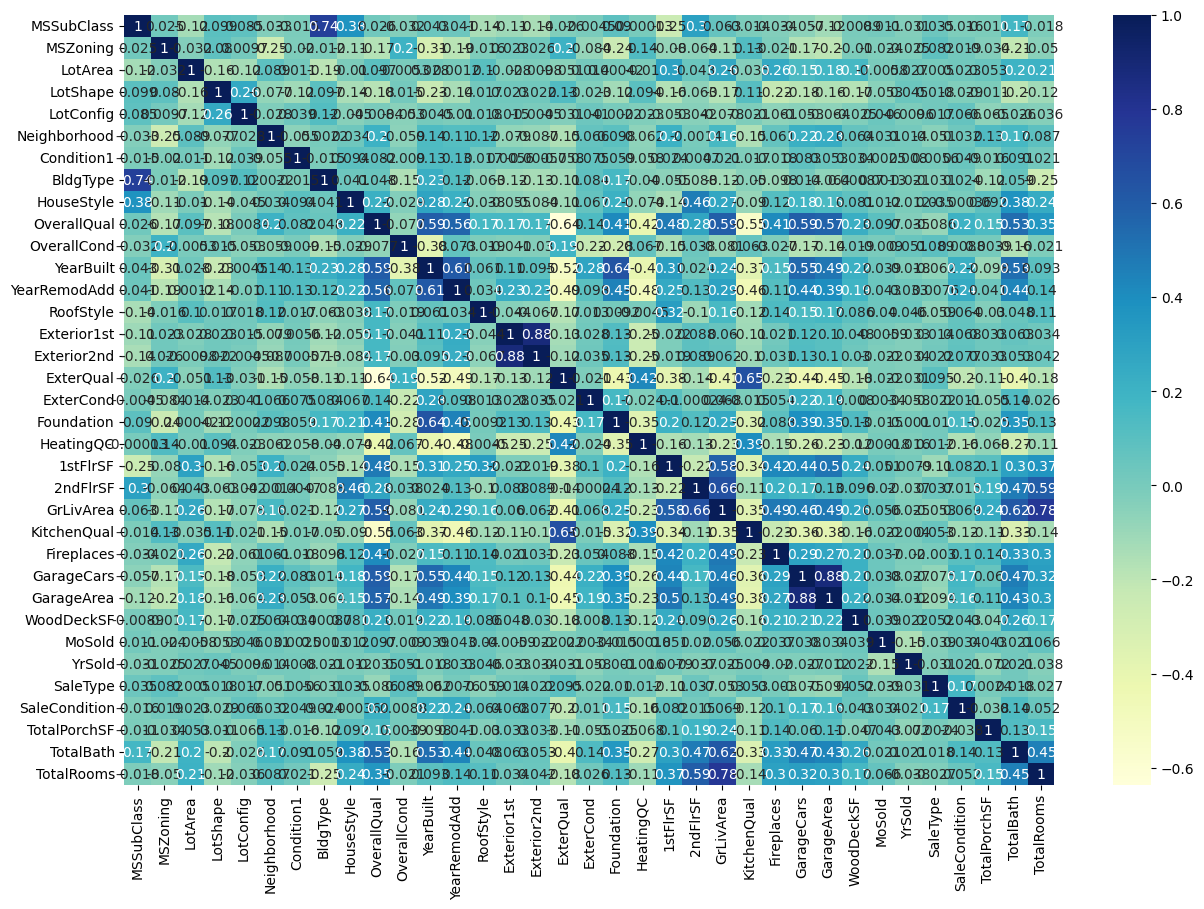

In [329]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = X_train.corr()

plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [332]:
# trying to subgroup, basic idk if correct or not
columns_list = X_train.columns

k = 7

subgroup_size = len(columns_list) // k

subgroups = [columns_list[i:i+subgroup_size] for i in range(0, len(columns_list), subgroup_size)]

# supposed subgroups
for i, subgroup in enumerate(subgroups):
    print(f"Subgroup {i+1}: {subgroup}")

Subgroup 1: Index(['MSSubClass', 'MSZoning', 'LotArea', 'LotShape', 'LotConfig'], dtype='object')
Subgroup 2: Index(['Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'OverallQual'], dtype='object')
Subgroup 3: Index(['OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st'], dtype='object')
Subgroup 4: Index(['Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'HeatingQC'], dtype='object')
Subgroup 5: Index(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces'], dtype='object')
Subgroup 6: Index(['GarageCars', 'GarageArea', 'WoodDeckSF', 'MoSold', 'YrSold'], dtype='object')
Subgroup 7: Index(['SaleType', 'SaleCondition', 'TotalPorchSF', 'TotalBath', 'TotalRooms'], dtype='object')
